###Lab2, Modelado Simulacion y optimización
###Uniandes
####Developed by:
###Johan Alexis Bautista Quinayas &
###Danny Camilo Muñoz Sanabria

In [ ]:
!apt-get install -y -qq glpk-utils
!pip install pyomo

In [ ]:
"""
Task1, Lab2, Modelado Simulacion y optimización
Uniandes
Developed by:
@Johan Alexis Bautista Quinayas & @Danny Camilo Muñoz Sanabria
"""

from pyomo.environ import *

model = ConcreteModel()
#Conjuntos
model.productores = Set(initialize=["Bogota", "Medellin"])
model.consumidores = Set(initialize=["Cali", "Barranquilla", "Pasto", "Tunja", "Chia", "Manizales"])

#Parameters
Oferta = {"Bogota": 550,
          "Medellin":700}
demanda = {"Cali":125,
           "Barranquilla":175,
           "Pasto":225,
           "Tunja":250,
           "Chia": 225,
           "Manizales": 200}

"""c_pc: costo de transportar del productor p al consumidor c"""
costos = {"Bogota": {"Cali":9999,
           "Barranquilla":2.5,
           "Pasto":1.6,
           "Tunja":1.4,
           "Chia": 0.8,
           "Manizales": 1.4},
          "Medellin": {"Cali":2.5,
           "Barranquilla":9999,
           "Pasto":2.0,
           "Tunja":1.0,
           "Chia": 1.0,
           "Manizales": 0.8}}


# Variables de decision
model.x = Var(model.productores, model.consumidores, domain=NonNegativeReals)

# Funcion objetivo
model.obj = Objective(expr=sum(model.x[p, c]*costos[p][c] for p in model.productores for c in model.consumidores), sense=minimize)

# Restricciones
def enviado_equals_to_oferta(model, p):
    return sum(model.x[p, c] for c in model.consumidores) <= Oferta[p]

def recibido_equals_to_demanda(model, c):
    return sum(model.x[p, c] for p in model.productores) == demanda[c]

model.enviado_equals_to_oferta = Constraint(model.productores, rule=enviado_equals_to_oferta)
model.recibido_equals_to_demanda = Constraint(model.consumidores, rule=recibido_equals_to_demanda)

model.dual = Suffix(direction=Suffix.IMPORT)

solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
results = solver.solve(model, tee=True)


print("Costo mínimo:", value(model.obj))
for p in model.productores:
    for c in model.consumidores:
        if model.x[p, c].value > 0:
            print(f"Transportar {model.x[p, c].value} toneladas de {p} a {c} con costo {costos[p][c]}")

# Obtener los valores duales (precios sombra)
print("\nValores duales (precios sombra):")
for c in model.consumidores:
    print(f"Precio sombra de la demanda en {c}: {model.dual[model.recibido_equals_to_demanda[c]]}")
for p in model.productores:
    print(f"Precio sombra de la oferta en {p}: {model.dual[model.enviado_equals_to_oferta[p]]}")

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmp31negawi.glpk.raw --wglp /tmp/tmpj8js2h6p.glpk.glp --cpxlp
 /tmp/tmpfwtggtjs.pyomo.lp
Reading problem data from '/tmp/tmpfwtggtjs.pyomo.lp'...
8 rows, 12 columns, 24 non-zeros
81 lines were read
Writing problem data to '/tmp/tmpj8js2h6p.glpk.glp'...
67 lines were written
GLPK Simplex Optimizer 5.0
8 rows, 12 columns, 24 non-zeros
Preprocessing...
8 rows, 12 columns, 24 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 8
      0: obj =   1.751222500e+06 inf =   5.000e+02 (1)
      3: obj =   1.251317500e+06 inf =   0.000e+00 (0)
*     6: obj =   1.715000000e+03 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (39693 bytes)
Writing basic solution to '/tmp/tmp31negawi.glpk.raw'...
29 lines were written
Costo mínimo: 1715.0
Tran

ERROR:pyomo.common.numeric_types:evaluating object as numeric value: decision[1,0,0]
    (object: <class 'pyomo.core.base.var.VarData'>)
No value for uninitialized NumericValue object decision[1,0,0]
ERROR:pyomo.common.numeric_types:evaluating object as numeric value: objetivo
    (object: <class 'pyomo.core.base.objective.ScalarObjective'>)
No value for uninitialized NumericValue object decision[1,0,0]


Model unknown

  Variables:
    decision : Size=108, Index=equipos*localidades*localidades
        Key       : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 0, 0) :     0 :  None :     1 : False :  True : Binary
        (1, 0, 1) :     0 :   0.0 :     1 : False : False : Binary
        (1, 0, 2) :     0 :   0.0 :     1 : False : False : Binary
        (1, 0, 3) :     0 :   0.0 :     1 : False : False : Binary
        (1, 0, 4) :     0 :   0.0 :     1 : False : False : Binary
        (1, 0, 5) :     0 :   1.0 :     1 : False : False : Binary
        (1, 1, 0) :     0 :   0.0 :     1 : False : False : Binary
        (1, 1, 1) :     0 :   0.0 :     1 : False : False : Binary
        (1, 1, 2) :     0 :   0.0 :     1 : False : False : Binary
        (1, 1, 3) :     0 :   0.0 :     1 : False : False : Binary
        (1, 1, 4) :     0 :   0.0 :     1 : False : False : Binary
        (1, 1, 5) :     0 :   0.0 :     1 : False : False : Binary
        (1, 2, 0) :     0 :   1.0 :   

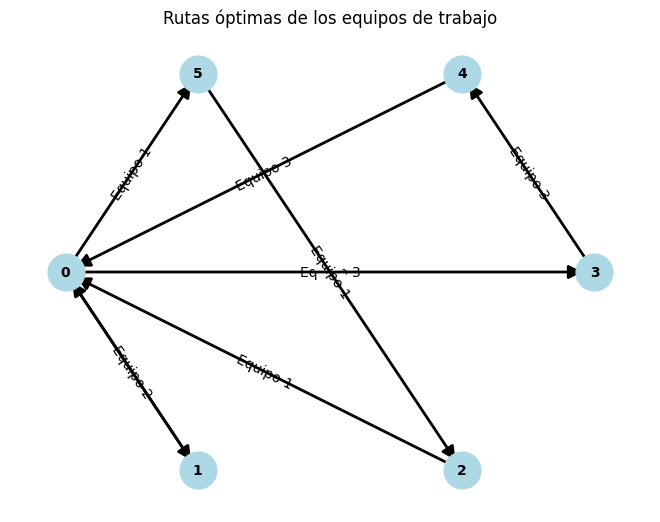

In [ ]:
"""
Task2, Lab2, Modelado Simulación y Optimización
Uniandes
Developed by:
@Johan Alexis Bautista Quinayas & @Danny Camilo Muñoz Sanabria
"""

from pyomo.environ import *
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

ruta_archivo = '/content/data/proof_case.csv'
matriz_distancias = pd.read_csv(ruta_archivo, header=0).values
modelo_rutas = ConcreteModel()
total_localidades = len(matriz_distancias)
total_equipos = 3
localidad_inicio = 0

modelo_rutas.equipos = RangeSet(1, total_equipos)
modelo_rutas.localidades = RangeSet(0, total_localidades - 1)

modelo_rutas.distancias = Param(modelo_rutas.localidades, modelo_rutas.localidades, initialize=lambda modelo_rutas, i, j: matriz_distancias[i][j])

# Variable de decisión: x[e, i, j] = 1 si el equipo e viaja de i a j
modelo_rutas.decision = Var(modelo_rutas.equipos, modelo_rutas.localidades, modelo_rutas.localidades, domain=Binary)

modelo_rutas.objetivo = Objective(
    expr=sum(modelo_rutas.distancias[i, j] * modelo_rutas.decision[e, i, j] for e in modelo_rutas.equipos for i in modelo_rutas.localidades for j in modelo_rutas.localidades),
    sense=minimize
)

# Restricción: cada equipo debe salir de la localidad de origen
modelo_rutas.salida_origen = Constraint(
    modelo_rutas.equipos,
    rule=lambda modelo_rutas, e: sum(modelo_rutas.decision[e, localidad_inicio, j] for j in modelo_rutas.localidades if j != localidad_inicio) == 1
)

# Restricción: cada equipo debe regresar a la localidad de origen
modelo_rutas.regreso_origen = Constraint(
    modelo_rutas.equipos,
    rule=lambda modelo_rutas, e: sum(modelo_rutas.decision[e, i, localidad_inicio] for i in modelo_rutas.localidades if i != localidad_inicio) == 1
)

# Restricción: cada localidad debe ser visitada exactamente una vez
def restriccion_visita(modelo_rutas, i):
    if i != localidad_inicio:
        return sum(modelo_rutas.decision[e, i, j] for e in modelo_rutas.equipos for j in modelo_rutas.localidades if j != i) == 1
    return Constraint.Skip
modelo_rutas.visita_unica = Constraint(modelo_rutas.localidades, rule=restriccion_visita)

# Restricción de continuidad (lo que entra debe salir)
def restriccion_continuidad(modelo_rutas, e, i):
    if i != localidad_inicio:
        return sum(modelo_rutas.decision[e, i, j] for j in modelo_rutas.localidades if j != i) == sum(modelo_rutas.decision[e, j, i] for j in modelo_rutas.localidades if j != i)
    return Constraint.Skip
modelo_rutas.continua = Constraint(modelo_rutas.equipos, modelo_rutas.localidades, rule=restriccion_continuidad)

# Restricción MTZ para evitar subtours
modelo_rutas.u = Var(modelo_rutas.equipos, modelo_rutas.localidades, domain=NonNegativeIntegers)
modelo_rutas.subtours = Constraint(
    modelo_rutas.equipos, modelo_rutas.localidades, modelo_rutas.localidades,
    rule=lambda modelo_rutas, e, i, j: Constraint.Skip if i == localidad_inicio or j == localidad_inicio else (modelo_rutas.u[e, i] - modelo_rutas.u[e, j] + total_localidades * modelo_rutas.decision[e, i, j] <= total_localidades - 1)
)

solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
solver.solve(modelo_rutas)
modelo_rutas.display()

def imprimir_resultados(modelo_rutas):
    print("\n=== Resultados de las Rutas de los Equipos ===")
    distancia_total_modelo = 0
    for e in modelo_rutas.equipos:
        print(f"\nEquipo {e}:")
        distancia_equipo = 0
        for i in modelo_rutas.localidades:
            for j in modelo_rutas.localidades:
                if modelo_rutas.decision[e, i, j].value == 1:  # Si el equipo viaja de i a j
                    print(f"De {i} a {j} - Distancia: {modelo_rutas.distancias[i, j]}")
                    distancia_equipo += modelo_rutas.distancias[i, j]
        distancia_total_modelo += distancia_equipo
        print(f"Distancia total recorrida por el equipo {e}: {distancia_equipo}")
    print(f"\nDistancia total recorrida por todos los equipos: {distancia_total_modelo}")

def visualizar_rutas(modelo_rutas):
    G = nx.DiGraph()
    localidades = [i for i in modelo_rutas.localidades]
    G.add_nodes_from(localidades)

    for e in modelo_rutas.equipos:
        for i in modelo_rutas.localidades:
            for j in modelo_rutas.localidades:
                if modelo_rutas.decision[e, i, j].value == 1:
                    G.add_edge(i, j, label=f'Equipo {e}')

    pos = nx.shell_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold")
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color="black", width=2)
    plt.title("Rutas óptimas de los equipos de trabajo")
    plt.show()

imprimir_resultados(modelo_rutas)
visualizar_rutas(modelo_rutas)


In [ ]:
"""
Task3, Lab2, Modelado Simulacion y optimización
Uniandes
Developed by:
@Johan Alexis Bautista Quinayas & @Danny Camilo Muñoz Sanabria
"""

from pyomo.environ import *
import pandas as pd

model = ConcreteModel()

# Carga de datos
installation_costs = pd.read_csv('/content/data/installation_costs.csv')
communication_costs = pd.read_csv('/content/data/communication_costs.csv')
energy_consumption = pd.read_csv('/content/data/energy_consumption.csv')
sensor_coverage = pd.read_csv('/content/data/sensor_coverage.csv')

# Transformar datos en diccionarios
installation_costs = dict(zip(installation_costs['Location'], installation_costs['InstallationCost']))
energy_consumption = dict(zip(energy_consumption['SensorType'], energy_consumption['EnergyConsumption']))
communication_costs = (
    communication_costs.groupby('Location')
    .apply(lambda x: dict(zip(x['SensorType'], x['CommunicationCost'])))
    .to_dict()
)

# Transformar sensor_coverage para crear el parámetro delta
sensor_coverage = sensor_coverage.set_index('Location').T.to_dict()
delta = {(l, s): sensor_coverage[l].get(s, 0) for l in sensor_coverage for s in sensor_coverage[l]}

# Adjacencias
Adj = {
    'L1': {'L1', 'L2', 'L3', 'L5'},
    'L2': {'L2', 'L1', 'L5'},
    'L3': {'L3', 'L1', 'L5', 'L4', 'L6', 'L8', 'L7'},
    'L4': {'L4', 'L3', 'L5', 'L6', 'L11'},
    'L5': {'L5', 'L1', 'L2', 'L3', 'L4', 'L11', 'L10'},
    'L6': {'L6', 'L3', 'L4', 'L8', 'L11'},
    'L7': {'L7', 'L3', 'L8', 'L12'},
    'L8': {'L8', 'L7', 'L6', 'L3', 'L11', 'L9', 'L12'},
    'L9': {'L9', 'L10', 'L11', 'L8', 'L12'},
    'L10': {'L10', 'L5', 'L11', 'L9'},
    'L11': {'L11', 'L5', 'L4', 'L6', 'L8', 'L9', 'L10'},
    'L12': {'L12', 'L7', 'L8', 'L9'}
}

# Conjuntos
model.L = Set(initialize=sorted(installation_costs.keys()))
model.S = Set(initialize=sorted(energy_consumption.keys()))

# Parámetros
model.installation_costs = Param(model.L, initialize=installation_costs)
model.energy_consumption = Param(model.S, initialize=energy_consumption)
model.communication_costs = Param(model.L, model.S, initialize=lambda model, l, s: communication_costs[l][s])
model.delta = Param(model.L, model.S, initialize=lambda model, l, s: delta[(l, s)])

# Variables de decisión
model.x = Var(model.L, model.S, within=Binary)

# Función objetivo
def objective_rule(model):
    return sum((model.installation_costs[l] + model.energy_consumption[s] + model.communication_costs[l, s]) * model.x[l, s] for l in model.L for s in model.S)
model.Objective = Objective(rule=objective_rule, sense=minimize)

# Restricción de cobertura
def sensor_need_rule(model, l, s):
    return sum(model.x[k, s] * model.delta[l, s] for k in Adj[l].union({l})) >= model.delta[l, s]
model.Sensor_Need_Constraint = Constraint(model.L, model.S, rule=sensor_need_rule)

# Resolución del modelo
solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
solver.solve(model)
model.display()

def print_results(model):
    print("Resultados de la Optimización de la Colocación de Sensores:")
    for l in model.L:
        any_sensor_installed = False
        for s in model.S:
            if model.x[l, s].value == 1:
                print(f"Localización {l}:")
                print(f"   Sensor {s} instalado.")
    print(f"\nCosto total de la solución: {model.Objective.expr()}")

print_results(model)


Model unknown

  Variables:
    x : Size=36, Index=L*S
        Key           : Lower : Value : Upper : Fixed : Stale : Domain
         ('L1', 'S1') :     0 :   0.0 :     1 : False : False : Binary
         ('L1', 'S2') :     0 :   0.0 :     1 : False : False : Binary
         ('L1', 'S3') :     0 :   0.0 :     1 : False : False : Binary
        ('L10', 'S1') :     0 :   0.0 :     1 : False : False : Binary
        ('L10', 'S2') :     0 :   0.0 :     1 : False : False : Binary
        ('L10', 'S3') :     0 :   0.0 :     1 : False : False : Binary
        ('L11', 'S1') :     0 :   1.0 :     1 : False : False : Binary
        ('L11', 'S2') :     0 :   1.0 :     1 : False : False : Binary
        ('L11', 'S3') :     0 :   0.0 :     1 : False : False : Binary
        ('L12', 'S1') :     0 :   0.0 :     1 : False : False : Binary
        ('L12', 'S2') :     0 :   0.0 :     1 : False : False : Binary
        ('L12', 'S3') :     0 :   0.0 :     1 : False : False : Binary
         ('L2', 'S1') 